In [1]:
!ls ../data-advertisement-datav2/

ads-daily.xlsx
ads-hourly.xlsx
数据提供-广告：AmazonAllListingReport.xlsx
数据提供-广告：AmazonMachingProductForSk....xlsx
数据提供-广告：日销数据.xlsx
数据提供-广告：活动数据.xlsx
数据提供-广告：销售数据-小时粒度.xlsx


In [2]:
import pandas as pd
import numpy as np

# load data

In [3]:
%%time

#daily ads data
df_adv_daily = pd.read_excel('../data-advertisement-datav2/ads-daily.xlsx',engine = "openpyxl")

CPU times: user 1min 26s, sys: 283 ms, total: 1min 27s
Wall time: 1min 27s


In [4]:
%%time
#2-hour ads data
df_adv_hourly = pd.read_excel('../data-advertisement-datav2/ads-hourly.xlsx',engine = "openpyxl")

CPU times: user 1min 39s, sys: 132 ms, total: 1min 39s
Wall time: 1min 39s


In [5]:
%%time
#product info
product_info_1 = pd.read_excel('../data-advertisement-datav2/数据提供-广告：AmazonAllListingReport.xlsx',engine = "openpyxl")
product_info_2 = pd.read_excel('../data-advertisement-datav2/数据提供-广告：AmazonMachingProductForSk....xlsx',engine = "openpyxl")

CPU times: user 40.4 s, sys: 28 ms, total: 40.4 s
Wall time: 40.4 s


In [6]:
%%time
#sales info
sales_daily = pd.read_excel('../data-advertisement-datav2/数据提供-广告：日销数据.xlsx',engine = "openpyxl")
sales_hourly = pd.read_excel('../data-advertisement-datav2/数据提供-广告：销售数据-小时粒度.xlsx',engine = "openpyxl")

CPU times: user 671 ms, sys: 0 ns, total: 671 ms
Wall time: 670 ms


In [7]:
%%time
#campaign data
df_campaign = pd.read_excel('../data-advertisement-datav2/数据提供-广告：活动数据.xlsx',engine = "openpyxl")

CPU times: user 215 ms, sys: 0 ns, total: 215 ms
Wall time: 213 ms


In [8]:
%%time
#keyword data
data_keyword_old_ranking = pd.read_csv('../aws-v1/asin旧关键词排名.csv',encoding='gbk')
data_keyword = pd.read_csv('../aws-v1/asin关键词排名.csv')

CPU times: user 1.83 s, sys: 184 ms, total: 2.01 s
Wall time: 1.49 s


# process data (daily)

In [13]:
df_adv_daily.head()

,ID,AccountId,RequestDate,CampaignName,CampaignId,AdGroupName,AdGroupId,TargetId,TargetingText,TargetingType,...,AttributedSales30dSameSKU,AttributedUnitsOrdered1dSameSKU,AttributedUnitsOrdered7dSameSKU,AttributedUnitsOrdered14dSameSKU,AttributedUnitsOrdered30dSameSKU,AttributedKindleEditionNormalizedPagesRead14d,AttributedKindleEditionNormalizedPagesRoyalties14d,AdType,delFlag,asin_k
0,1497465,1029,2021-10-12,A.Shirley.B2BAI0651.Heater.1012,101699121359424,auto,117695687755035,259976381901269,close-match,TARGETING_EXPRESSION_PREDEFINED,...,69.99,1.0,1.0,1.0,1.0,NaT,NaT,SP,0,EE24118F-992D-4979-BF2A-4305B7B0A690
1,1497466,1029,2021-10-12,A.Shirley.B2BAI0651.Heater.1012,101699121359424,auto,117695687755035,259976381901269,close-match,TARGETING_EXPRESSION_PREDEFINED,...,0.00,0.0,0.0,0.0,0.0,NaT,NaT,SP,0,EE24118F-992D-4979-BF2A-4305B7B0A690
2,1497467,1029,2021-10-12,A.Shirley.B2BAI0651.Heater.1012,101699121359424,auto,117695687755035,259976381901269,close-match,TARGETING_EXPRESSION_PREDEFINED,...,0.00,0.0,0.0,0.0,0.0,NaT,NaT,SP,0,EE24118F-992D-4979-BF2A-4305B7B0A690
3,1497468,1029,2021-10-12,A.Shirley.B2BAI0651.Heater.1012,101699121359424,auto,117695687755035,259976381901269,close-match,TARGETING_EXPRESSION_PREDEFINED,...,0.00,0.0,0.0,0.0,0.0,NaT,NaT,SP,0,EE24118F-992D-4979-BF2A-4305B7B0A690
4,1497469,1029,2021-10-12,A.Shirley.B2BAI0651.Heater.1012,101699121359424,auto,117695687755035,259976381901269,close-match,TARGETING_EXPRESSION_PREDEFINED,...,0.00,0.0,0.0,0.0,0.0,NaT,NaT,SP,0,EE24118F-992D-4979-BF2A-4305B7B0A690


In [10]:
df_adv_daily.iloc[0,:]

ID                                                                                 1497465
AccountId                                                                             1029
RequestDate                                                            2021-10-12 00:00:00
CampaignName                                               A.Shirley.B2BAI0651.Heater.1012
CampaignId                                                                 101699121359424
AdGroupName                                                                           auto
AdGroupId                                                                  117695687755035
TargetId                                                                   259976381901269
TargetingText                                                                  close-match
TargetingType                                              TARGETING_EXPRESSION_PREDEFINED
TargetingExpression                                                            close-match

In [11]:
def process_general_info(data_ad):
    print ("min time {}, max time {}".format(data_ad['RequestDate'].min(),data_ad['RequestDate'].max()))
    print ("total data shape: {}".format(data_ad.shape))
    print ("by type distribution: sp {}, sb{} sd{} sbv{} nan{}".format(
           len(data_ad[data_ad['AdType']=='SP']),\
           len(data_ad[data_ad['AdType']=='SB']),\
           len(data_ad[data_ad['AdType']=='SD']),\
           len(data_ad[data_ad['AdType']=='SBV']),\
           len(data_ad[data_ad['AdType']=='nan'])
          ))
    #print ("total asin number: ", data_ad['Asin'].nunique())
    print ("total ID number: ", data_ad['ID'].nunique())
    print ("total asin_k number: ", data_ad['asin_k'].nunique())

process_general_info(df_adv_daily)

min time 2021-02-22 00:00:00, max time 2022-05-19 00:00:00
total data shape: (132498, 44)
by type distribution: sp 107900, sb0 sd0 sbv0 nan0
total ID number:  132498
total asin_k number:  117


In [12]:
# join sales infor
def judge_asin_match(df1,df2, asin1,asin2):
    list1 = df1[asin1].unique()
    list2 = df2[asin2].unique()
    #asin match
    res = [v for v in list1 if v in list2]

    print("total asin number {} matching number{} ".format(len(list1),len(res)))

# join sales info with overall sales
judge_asin_match(df_adv_daily,sales_daily, 'asin_k','asin_k')
#convert time type
sales_daily['time'] =pd.to_datetime(sales_daily['日期'], format = '%Y-%m-%d') 

total asin number 118 matching number46 


In [14]:
# join sales
df_daily = pd.merge(df_adv_daily,sales_daily,left_on=['RequestDate','asin_k'],right_on=['time','asin_k'],how='inner')

In [15]:
product_info_1.head()

,ID,AccountId,SiteInfoId,SiteInfoName,ItemName,ItemDescription,Quantity,OpenDate,FulfillmentChannel,Status,asin_k
0,2014218,1029,17,AmazonUS,Air Choice Ice Maker - Portable Ice Maker Mach...,Air Choice Portable Ice Maker Machine for Coun...,0,2020-07-30 20:18:27 PDT,DEFAULT,Inactive,A31333E8-06FE-45D7-8C4E-4DF70DC7353B
1,2014219,1029,17,AmazonUS,Space Heater - TRUSTECH Tower Heater 1500W 70°...,<b>Are you still trembling in the frigid rooms...,0,2020-07-26 18:57:39 PDT,AMAZON_NA,Inactive,2CF69A1A-C895-4287-8971-AA05A7C98997
2,2014224,1029,17,AmazonUS,"Wall Space Heater, 1500W Mica Wall Electric He...","RUSTECH space heater for indoor use, it will h...",0,2021-04-23 04:27:35 PDT,AMAZON_NA,Inactive,E417CA2D-A5DF-4E48-A46A-959D58E5969E
3,2014233,1029,17,AmazonUS,"Space Radiant Heater - Infrared Heater,120° Os...",<br><b>Trustech Space Infrared Heater</b> <br>...,0,2020-12-22 23:24:47 PST,AMAZON_NA,Inactive,A5715A30-C922-4AD1-83DC-1C1636BDA31A
4,2014234,1029,17,AmazonUS,Electric Cooler Tower Fans,Air Cooler - Portable Tower Oscillating Fan wi...,0,2021-08-30 00:37:39 PDT,AMAZON_NA,Inactive,DD9FAA93-CC48-4BC1-A065-D59E790D576F


In [16]:
#join sku information
judge_asin_match(df_daily,product_info_1, 'asin_k','asin_k')
judge_asin_match(df_daily,product_info_2, 'asin_k','asin_k')
# join sales
df_daily = pd.merge(df_daily,product_info_1[['ItemName','ItemDescription','asin_k']],left_on=['asin_k'],right_on=['asin_k'],how='left')
df_daily = pd.merge(df_daily,product_info_2[['Binding','Brand','Label','ListPriceAmount','Color','asin_k','ProductGroup','ProductTypeName']],left_on=['asin_k'],right_on=['asin_k'],how='left')

total asin number 27 matching number26 
total asin number 27 matching number24 


In [17]:
#join campaign data
#only keep campain data tha is not cancelled
df_campaign_active = df_campaign[df_campaign['campaign_status']!='Cancelled']
#map to multi-rows
df_campaign_active['DATE'] = [pd.date_range(s, e, freq='d') for s, e in
              zip(pd.to_datetime(df_campaign_active['site_start_time']), pd.to_datetime(df_campaign_active['site_end_time']))]

df_campaign_active = df_campaign_active.explode('DATE').drop(['site_start_time', 'site_end_time'], axis=1)
#join back to sales
df_daily = pd.merge(df_daily,df_campaign_active[['campaign_type','sales_price','campaign_price','discount','DATE','asin_k']],left_on=['RequestDate','asin_k'],right_on=['DATE','asin_k'],how='left')

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [18]:
#join keywords
# here got problem - need to check!!
judge_asin_match(df_daily,data_keyword_old_ranking, 'Query','KeyWordName')
judge_asin_match(df_daily,data_keyword, 'Query','KeyWordName')

total asin number 2823 matching number17 
total asin number 2823 matching number1 


In [19]:
df_daily.columns

Index(['ID', 'AccountId', 'RequestDate', 'CampaignName', 'CampaignId',
       'AdGroupName', 'AdGroupId', 'TargetId', 'TargetingText',
       'TargetingType', 'TargetingExpression', 'Query', 'Impressions',
       'Clicks', 'Cost', 'AttributedConversions1d', 'AttributedConversions7d',
       'AttributedConversions14d', 'AttributedConversions30d',
       'AttributedConversions1dSameSKU', 'AttributedConversions7dSameSKU',
       'AttributedConversions14dSameSKU', 'AttributedConversions30dSameSKU',
       'AttributedUnitsOrdered1d', 'AttributedUnitsOrdered7d',
       'AttributedUnitsOrdered14d', 'AttributedUnitsOrdered30d',
       'AttributedSales1d', 'AttributedSales7d', 'AttributedSales14d',
       'AttributedSales30d', 'AttributedSales1dSameSKU',
       'AttributedSales7dSameSKU', 'AttributedSales14dSameSKU',
       'AttributedSales30dSameSKU', 'AttributedUnitsOrdered1dSameSKU',
       'AttributedUnitsOrdered7dSameSKU', 'AttributedUnitsOrdered14dSameSKU',
       'AttributedUnitsOrdered3

In [20]:
df_daily['ProductTypeName']

0            AIR_COOLER
1            AIR_COOLER
2            AIR_COOLER
3            AIR_COOLER
4            AIR_COOLER
               ...     
9410707    ELECTRIC_FAN
9410708    ELECTRIC_FAN
9410709    ELECTRIC_FAN
9410710    ELECTRIC_FAN
9410711    ELECTRIC_FAN
Name: ProductTypeName, Length: 9410712, dtype: object

# feature engineering

In [21]:
%%time
data = df_daily.iloc[:,:]

CPU times: user 68 µs, sys: 1e+03 ns, total: 69 µs
Wall time: 74.6 µs


In [22]:
data.columns

Index(['ID', 'AccountId', 'RequestDate', 'CampaignName', 'CampaignId',
       'AdGroupName', 'AdGroupId', 'TargetId', 'TargetingText',
       'TargetingType', 'TargetingExpression', 'Query', 'Impressions',
       'Clicks', 'Cost', 'AttributedConversions1d', 'AttributedConversions7d',
       'AttributedConversions14d', 'AttributedConversions30d',
       'AttributedConversions1dSameSKU', 'AttributedConversions7dSameSKU',
       'AttributedConversions14dSameSKU', 'AttributedConversions30dSameSKU',
       'AttributedUnitsOrdered1d', 'AttributedUnitsOrdered7d',
       'AttributedUnitsOrdered14d', 'AttributedUnitsOrdered30d',
       'AttributedSales1d', 'AttributedSales7d', 'AttributedSales14d',
       'AttributedSales30d', 'AttributedSales1dSameSKU',
       'AttributedSales7dSameSKU', 'AttributedSales14dSameSKU',
       'AttributedSales30dSameSKU', 'AttributedUnitsOrdered1dSameSKU',
       'AttributedUnitsOrdered7dSameSKU', 'AttributedUnitsOrdered14dSameSKU',
       'AttributedUnitsOrdered3

In [23]:
%%time
#data = data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]

print ("add time related features~!")
data['weekday'] = data['RequestDate'].map(lambda x: x.dayofweek) 
data['month'] = data['RequestDate'].map(lambda x: x.month) 
#加入季节特征
data['quarter'] =  data['RequestDate'].map(lambda x: x.quarter) 


data.rename(columns = {'销售数量':'sales',
                       '成交额（去折扣后）':'gmv(afterdicsount)',
                      }, inplace=True)

add time related features~!
CPU times: user 2min 15s, sys: 2.71 s, total: 2min 18s
Wall time: 2min 16s


In [24]:
def renmame(x):
    if x=='优惠券':
        y =  'coupon'
    elif x=='秒杀':
        y = 'ms'
    elif x=='站外折扣':
        y = 'discount'
    else:
        y = ''
    return y

data['campaign_type'] = data['campaign_type'].map(lambda x:renmame(x))

In [25]:
data['campaign_type'].unique()

array(['coupon', 'ms', '', 'discount'], dtype=object)

In [27]:
data.columns

Index(['ID', 'AccountId', 'RequestDate', 'CampaignName', 'CampaignId',
       'AdGroupName', 'AdGroupId', 'TargetId', 'TargetingText',
       'TargetingType', 'TargetingExpression', 'Query', 'Impressions',
       'Clicks', 'Cost', 'AttributedConversions1d', 'AttributedConversions7d',
       'AttributedConversions14d', 'AttributedConversions30d',
       'AttributedConversions1dSameSKU', 'AttributedConversions7dSameSKU',
       'AttributedConversions14dSameSKU', 'AttributedConversions30dSameSKU',
       'AttributedUnitsOrdered1d', 'AttributedUnitsOrdered7d',
       'AttributedUnitsOrdered14d', 'AttributedUnitsOrdered30d',
       'AttributedSales1d', 'AttributedSales7d', 'AttributedSales14d',
       'AttributedSales30d', 'AttributedSales1dSameSKU',
       'AttributedSales7dSameSKU', 'AttributedSales14dSameSKU',
       'AttributedSales30dSameSKU', 'AttributedUnitsOrdered1dSameSKU',
       'AttributedUnitsOrdered7dSameSKU', 'AttributedUnitsOrdered14dSameSKU',
       'AttributedUnitsOrdered3

In [28]:
%%time

def get_past_features(feature_name,data):
    groups = data.groupby(['asin_k'])[feature_name]
    #past n day lag feature, rolling window feature
    for i in [1,3]:
        data[f'Lag_{i}_{feature_name}'] = groups.shift(i)
        data[f'rolling_sum_{i}_{feature_name}'] = groups.shift(i).rolling(i).sum().reset_index()[feature_name]
        data[f'rolling_mean_{i}_{feature_name}'] = groups.shift(i).rolling(i).mean().reset_index()[feature_name]

print ("<<< start get past features!")
for i in ['GMV','sales','AttributedSales7d','AttributedConversions1d','Clicks']:
    get_past_features(i,data)

<<< start get past features!
CPU times: user 1min 1s, sys: 16.9 s, total: 1min 18s
Wall time: 25.3 s


In [29]:
%%time

print ("<<< start get one-hot features!")


li_sparse_features = ['asin_k','campaign_type','Binding','Brand','Label','ProductGroup','ProductTypeName','month','weekday','AdType']

# 特征进行one_hot
for feature in li_sparse_features:
    data1 = pd.get_dummies(data[feature], prefix=feature)
    print(data.shape, data1.shape)
    data = pd.concat((data, data1), axis=1)
    print(data.shape)

<<< start get one-hot features!
(9410712, 96) (9410712, 27)
(9410712, 123)
(9410712, 123) (9410712, 4)
(9410712, 127)
(9410712, 127) (9410712, 3)
(9410712, 130)
(9410712, 130) (9410712, 2)
(9410712, 132)
(9410712, 132) (9410712, 6)
(9410712, 138)
(9410712, 138) (9410712, 4)
(9410712, 142)
(9410712, 142) (9410712, 5)
(9410712, 147)
(9410712, 147) (9410712, 2)
(9410712, 149)
(9410712, 149) (9410712, 7)
(9410712, 156)
(9410712, 156) (9410712, 1)
(9410712, 157)
CPU times: user 3min 49s, sys: 2min 4s, total: 5min 53s
Wall time: 3min 50s


In [30]:
data.columns

Index(['ID', 'AccountId', 'RequestDate', 'CampaignName', 'CampaignId',
       'AdGroupName', 'AdGroupId', 'TargetId', 'TargetingText',
       'TargetingType',
       ...
       'month_4', 'month_5', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'AdType_SP'],
      dtype='object', length=157)

In [31]:
%%time


print ("<<<< start drop features")

for feature in ['ID', 'AccountId', 'CampaignName', 'CampaignId',
       'AdGroupName', 'AdGroupId', 'TargetId', 'TargetingText',
       'TargetingType', 'TargetingExpression', 'Query', 'Impressions',
       'AttributedConversions1d', 'Cost', 'AttributedConversions7d',
       'AttributedConversions14d', 'AttributedConversions30d',
       'AttributedConversions1dSameSKU', 'AttributedConversions7dSameSKU',
       'AttributedConversions14dSameSKU', 'AttributedConversions30dSameSKU',
       'AttributedUnitsOrdered1d', 'AttributedUnitsOrdered7d',
       'AttributedUnitsOrdered14d', 'AttributedUnitsOrdered30d',
       'AttributedSales1d', 'AttributedSales7d', 'AttributedSales14d',
       'AttributedSales30d', 'AttributedSales1dSameSKU',
       'AttributedSales7dSameSKU', 'AttributedSales14dSameSKU',
       'AttributedSales30dSameSKU', 'AttributedUnitsOrdered1dSameSKU',
       'AttributedUnitsOrdered7dSameSKU', 'AttributedUnitsOrdered14dSameSKU',
       'AttributedUnitsOrdered30dSameSKU',
       'AttributedKindleEditionNormalizedPagesRead14d',
       'AttributedKindleEditionNormalizedPagesRoyalties14d', 'AdType',
       'delFlag', 'asin_k', '日期', 'GMV', 'gmv(afterdicsount)', 'sales', 'time',
       'ItemName', 'ItemDescription', 'Binding', 'Brand', 'Label'
       , 'Color', 'ProductGroup', 'ProductTypeName',
       'campaign_type', 'DATE']:
    data.drop(feature, axis=1, inplace=True)

print(data.shape)

<<<< start drop features
(9410712, 100)
CPU times: user 3min 30s, sys: 5min 6s, total: 8min 36s
Wall time: 5min 16s


In [32]:
data.columns

Index(['RequestDate', 'Clicks', 'ListPriceAmount', 'sales_price',
       'campaign_price', 'discount', 'weekday', 'month', 'quarter',
       'Lag_1_GMV', 'rolling_sum_1_GMV', 'rolling_mean_1_GMV', 'Lag_3_GMV',
       'rolling_sum_3_GMV', 'rolling_mean_3_GMV', 'Lag_1_sales',
       'rolling_sum_1_sales', 'rolling_mean_1_sales', 'Lag_3_sales',
       'rolling_sum_3_sales', 'rolling_mean_3_sales',
       'Lag_1_AttributedSales7d', 'rolling_sum_1_AttributedSales7d',
       'rolling_mean_1_AttributedSales7d', 'Lag_3_AttributedSales7d',
       'rolling_sum_3_AttributedSales7d', 'rolling_mean_3_AttributedSales7d',
       'Lag_1_AttributedConversions1d',
       'rolling_sum_1_AttributedConversions1d',
       'rolling_mean_1_AttributedConversions1d',
       'Lag_3_AttributedConversions1d',
       'rolling_sum_3_AttributedConversions1d',
       'rolling_mean_3_AttributedConversions1d', 'Lag_1_Clicks',
       'rolling_sum_1_Clicks', 'rolling_mean_1_Clicks', 'Lag_3_Clicks',
       'rolling_sum_3_C

# model

In [34]:
!pip install lightgbm xgboost

     |████████████████████████████████| 2.0 MB 22.7 MB/s            
     |████████████████████████████████| 173.6 MB 16 kB/s              


In [ ]:
import lightgbm as lgb
import re

cut_off = pd.to_datetime('2022-05-10')

#data = data.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

#rename columns

data_train = data.loc[pd.to_datetime(data['RequestDate'])<cut_off]
data_test = data.loc[pd.to_datetime(data['RequestDate'])>=cut_off]

X_train = data_train.drop(['Clicks','RequestDate'], axis=1).fillna(0)
X_test = data_test.drop(['Clicks','RequestDate'], axis=1).fillna(0)

log = False

if log is True:
    y_train = np.log(data_train['Clicks'].fillna(0))
    y_train[np.isinf(y_train)] = 0
    y_test = np.log(data_test['Clicks'].fillna(0))
    y_test[np.isinf(y_test)] = 0
else:
    y_train = data_train['Clicks'].fillna(0)
    y_test = data_test['Clicks'].fillna(0)

print ("trainset shape: ", X_train.shape)
print ("testset shape: ",X_test.shape)

print('Starting training...')
# 拟合XGBoost模型
from xgboost import XGBRegressor

model = XGBRegressor(max_depth=10,
                           n_estimators=100,
                           min_child_weight=7.5,
                           learning_rate=0.02,
                           nthread=8,
                           subsample=0.80,
                           colsample_bytree=0.80)

model.fit(X_train, y_train, eval_set=[(X_test, y_test),(X_train,y_train)], verbose=True, eval_metric=['rmse',"logloss"], early_stopping_rounds=100)

trainset shape:  (4312261, 98)
testset shape:  (5098451, 98)
Starting training...
[0]	validation_0-rmse:6.64012	validation_0-logloss:-9.02412	validation_1-rmse:2.63839	validation_1-logloss:-0.81279
[1]	validation_0-rmse:6.59529	validation_0-logloss:-12.75745	validation_1-rmse:2.58610	validation_1-logloss:-4.78177
[2]	validation_0-rmse:6.54892	validation_0-logloss:-14.72778	validation_1-rmse:2.53574	validation_1-logloss:-8.84025
[3]	validation_0-rmse:6.50854	validation_0-logloss:-17.41201	validation_1-rmse:2.48461	validation_1-logloss:-13.40560
[4]	validation_0-rmse:6.47044	validation_0-logloss:-18.84885	validation_1-rmse:2.43516	validation_1-logloss:-17.99679
[5]	validation_0-rmse:6.42969	validation_0-logloss:-19.98743	validation_1-rmse:2.38786	validation_1-logloss:-21.32024
[6]	validation_0-rmse:6.39040	validation_0-logloss:-20.90487	validation_1-rmse:2.34177	validation_1-logloss:-21.46489
[7]	validation_0-rmse:6.35274	validation_0-logloss:-21.84162	validation_1-rmse:2.29231	validatio

In [38]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

y_pred = model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print ("rmse:", rmse)
print ("error rate: ", rmse/np.mean(y_test))

rmse: 5.043579178310396
error rate:  2.7642699255878505


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

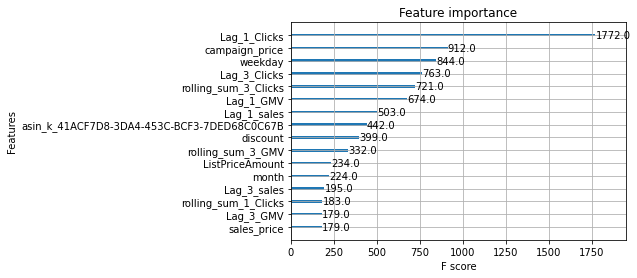

In [40]:
from xgboost import plot_importance #显示特征重要性

plot_importance(model,max_num_features=16)

In [101]:
plot_importance

<function xgboost.plotting.plot_importance(booster, ax=None, height=0.2, xlim=None, ylim=None, title='Feature importance', xlabel='F score', ylabel='Features', fmap='', importance_type='weight', max_num_features=None, grid=True, show_values=True, **kwargs)>